===== Basel III/IV Capital Requirement Report =====
Total RWA: 6,200,000.00
Tier 1 Capital: 900,000.00
Tier 2 Capital: 200,000.00
Capital Adequacy Ratio (CAR): 17.74%
Capital adequacy met.


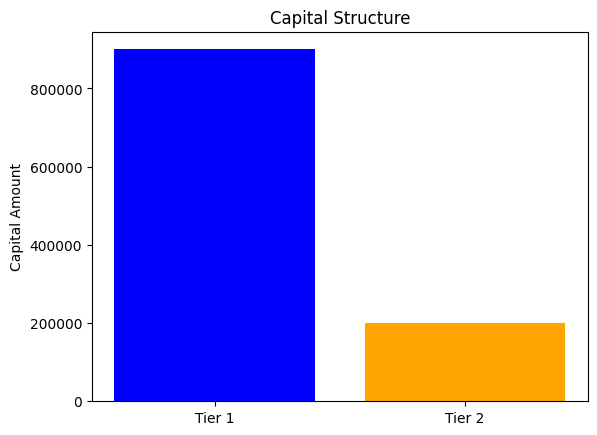

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import io

data_string = """Asset,Exposure,Risk_Weight,Tier1_Capital,Tier2_Capital
Corporate Loans,5000000,0.4,250000,60000
Retail Loans,3000000,0.70,200000,50000
Sovereign Bonds,2000000,0.05,150000,30000
Mortgage Loans,4000000,0.20,200000,40000
Trading Book,1500000,0.80,100000,20000
"""

class BaselCalculator:
    def __init__(self, data):
        """
        data: DataFrame with columns ['Asset', 'Exposure', 'Risk_Weight', 'Tier1_Capital', 'Tier2_Capital']
        """
        self.data = data

    def calculate_rwa(self):
        self.data['RWA'] = self.data['Exposure'] * self.data['Risk_Weight']
        total_rwa = self.data['RWA'].sum()
        return total_rwa

    def calculate_capital(self):
        tier1 = self.data['Tier1_Capital'].sum()
        tier2 = self.data['Tier2_Capital'].sum()
        return tier1, tier2

    def calculate_car(self, min_rwa_threshold=8): # Added min_rwa_threshold as a parameter
        total_rwa = self.calculate_rwa()
        tier1, tier2 = self.calculate_capital()
        total_capital = tier1 + tier2
        # Basel III/IV requires total capital to be at least 8% of RWA
        car = (total_capital / total_rwa) * 100 if total_rwa > 0 else 0 # Added check for total_rwa > 0
        return car

    def capital_shortfall(self, min_car=10.5):
        car = self.calculate_car()
        if car < min_car:
            return f"Capital shortfall detected! Increase capital by {(min_car - car):.2f}% of RWA."
        else:
            return "Capital adequacy met."

    def report(self):
        print("===== Basel III/IV Capital Requirement Report =====")
        print(f"Total RWA: {self.calculate_rwa():,.2f}")
        t1, t2 = self.calculate_capital()
        print(f"Tier 1 Capital: {t1:,.2f}")
        print(f"Tier 2 Capital: {t2:,.2f}")
        print(f"Capital Adequacy Ratio (CAR): {self.calculate_car():.2f}%")
        print(self.capital_shortfall())

    def plot_capital_structure(self):
        t1, t2 = self.calculate_capital()
        plt.bar(["Tier 1", "Tier 2"], [t1, t2], color=["blue", "orange"])
        plt.title("Capital Structure")
        plt.ylabel("Capital Amount")
        plt.show()

# Create DataFrame from the data string
df = pd.read_csv(io.StringIO(data_string))

# Instantiate the calculator and run the report
calculator = BaselCalculator(df)
calculator.report()

# Plot the capital structure
calculator.plot_capital_structure()